In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#px.histogram(data_frame=df[df['credit.policy']==1], x='fico')
#px.histogram(data_frame=df[df['credit.policy']==0], x='fico')

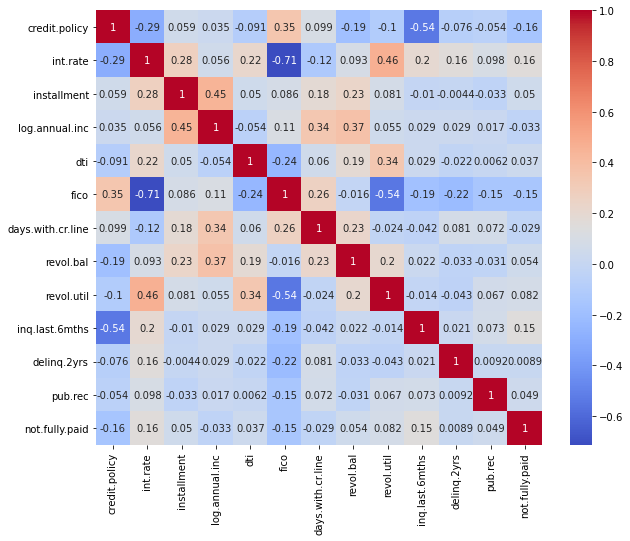

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('heatmap.png')

In [38]:
df.shape

(9578, 14)

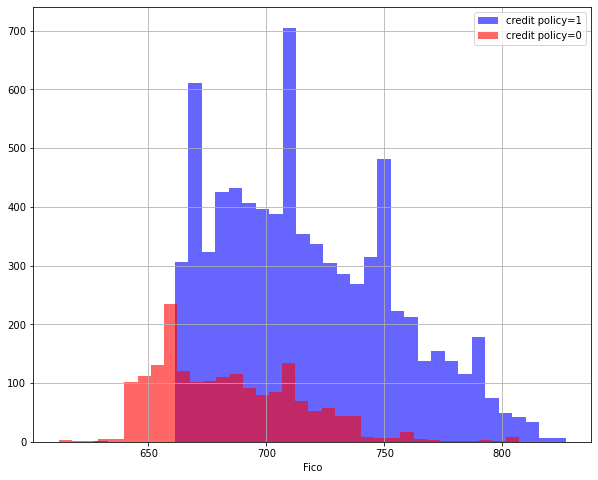

In [36]:
plt.figure(figsize=(10,8))
df[df['credit.policy']==1]['fico'].hist(bins=35,alpha=0.6,label='credit policy=1',color='blue')

df[df['credit.policy']==0]['fico'].hist(bins=35,alpha=0.6,label='credit policy=0',color='red')
plt.legend()
plt.xlabel('Fico')
plt.savefig('Fico.png')

Text(0.5, 0, 'Fico')

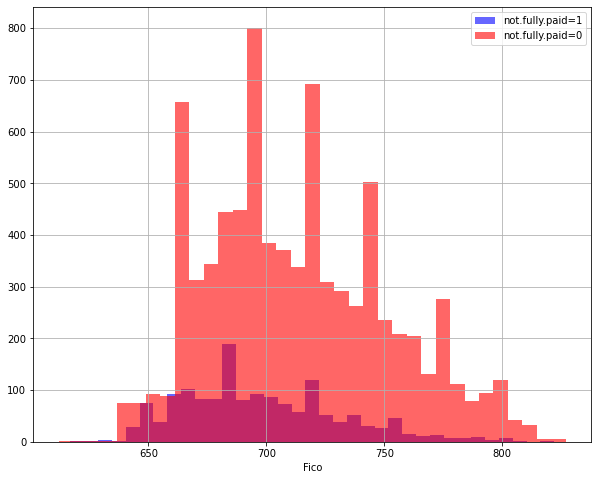

In [10]:
plt.figure(figsize=(10,8))
df[df['not.fully.paid']==1]['fico'].hist(bins=35,alpha=0.6,label='not.fully.paid=1',color='blue')

df[df['not.fully.paid']==0]['fico'].hist(bins=35,alpha=0.6,label='not.fully.paid=0',color='red')
plt.legend()
plt.xlabel('Fico')

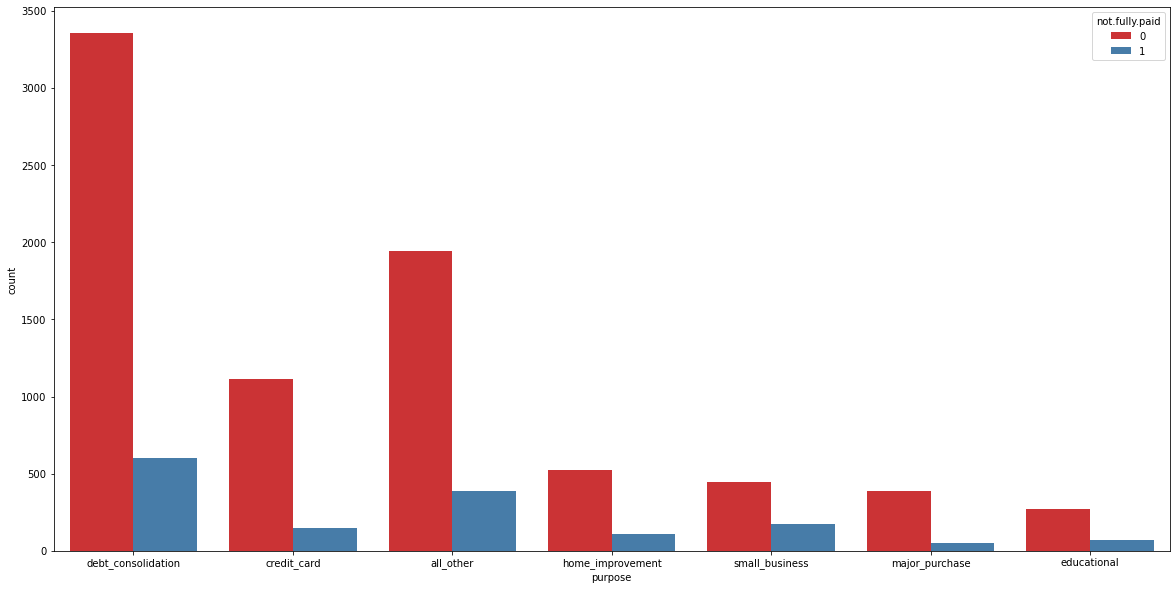

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='purpose',hue='not.fully.paid',palette='Set1')

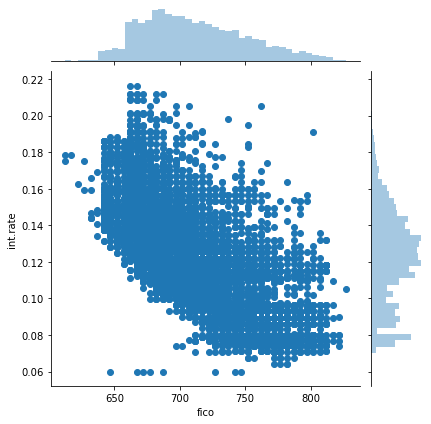

In [12]:
sns.jointplot(x='fico',y='int.rate',data=df)

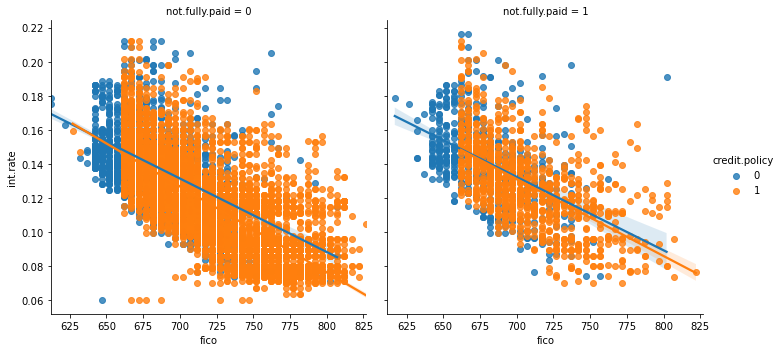

In [13]:
sns.lmplot(x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',data=df)

In [14]:
cat_features=['purpose']

In [15]:
final_data=pd.get_dummies(df,columns=cat_features,drop_first=True)

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [17]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree=DecisionTreeClassifier()

In [23]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
predictions=dtree.predict(x_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2666
           1       0.19      0.23      0.21       495

    accuracy                           0.72      3161
   macro avg       0.52      0.52      0.52      3161
weighted avg       0.75      0.72      0.74      3161



[[2173  493]
 [ 379  116]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
Rfc=RandomForestClassifier(n_estimators=1000)

In [29]:
Rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [30]:
prediction=Rfc.predict(x_test)

In [31]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2666
           1       0.50      0.02      0.03       495

    accuracy                           0.84      3161
   macro avg       0.67      0.51      0.47      3161
weighted avg       0.79      0.84      0.78      3161



[[2658    8]
 [ 487    8]]


# Conclusion:

# I think in this case DecisionTree method did better than RandomForest.